# Lariosa, Gerald Darwin D.

*February 10, 2025*

## Import Libraries

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Scrape Website Data

In [2]:
url = "https://www.bbc.com/news"
response = urllib.request.urlopen(url)
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()

In [4]:
print(text)

Home - BBC NewsSkip to contentBritish Broadcasting CorporationHomeNewsSportBusinessInnovationCultureArtsTravelEarthVideoLiveIsrael-Gaza WarWar in UkraineUS & CanadaUKAfricaAsiaAustraliaEuropeLatin AmericaMiddle EastIn PicturesBBC InDepthBBC VerifyHomeNewsIsrael-Gaza WarWar in UkraineUS & CanadaUKUK PoliticsEnglandN. IrelandN. Ireland PoliticsScotlandScotland PoliticsWalesWales PoliticsAfricaAsiaChinaIndiaAustraliaEuropeLatin AmericaMiddle EastIn PicturesBBC InDepthBBC VerifySportBusinessExecutive LoungeTechnology of BusinessFuture of BusinessInnovationTechnologyScience & HealthArtificial IntelligenceAI v the MindCultureFilm & TVMusicArt & DesignStyleBooksEntertainment NewsArtsArts in MotionTravelDestinationsAfricaAntarcticaAsiaAustralia and PacificCaribbean & BermudaCentral AmericaEuropeMiddle EastNorth AmericaSouth AmericaWorld’s TableCulture & ExperiencesAdventuresThe SpeciaListEarthNatural WondersWeather & ScienceClimate SolutionsSustainable BusinessGreen LivingVideoLiveLive NewsLiv

##  Load Stopwords

In [5]:

with open("stop_words.txt", "r") as f:
    stop_words = set(f.read().split())


## Tokenize and Count Stopwords

In [6]:

tokens = [token for token in text.split()]
stopword_count = [word for word in tokens if word.lower() in stop_words]

print(f"Total Stopwords Found: {len(stopword_count)}")
print("Stopwords List:", stopword_count)


Total Stopwords Found: 368
Stopwords List: ['to', 'in', 'in', 'of', 'of', 'the', 'in', 'and', 'on', 'and', 'of', 'the', 'be', 'with', 'a', 'a', 'that', 'have', 'the', 'in', 'on', 'after', 'a', 'on', 'from', 'was', 'from', 'of', 'his', 'in', 'the', 'of', 'in', 'in', 'is', 'about', 'a', 'who', 'with', 'his', 'and', 'in', 'was', 'to', 'the', 'of', 'a', 'on', 'after', 'a', 'on', 'from', 'to', 'them', 'the', 'to', 'and', 'them', 'an', 'and', 'at', 'in', 'and', 'from', 'in', 'by', 'it', 'was', 'a', 'but', 'they', 'to', 'was', 'from', 'of', 'his', 'in', 'the', 'of', 'more', 'in', 'are', 'to', 'the', 'for', 'in', 'a', 'from', 'that', 'in', 'to', 'by', 'into', 'was', 'to', 'down', 'the', 'of', 'How', 'that', 'his', 'is', 'have', 'for', 'has', 'as', 'a', 'and', 'a', 'in', 'the', 'a', 'about', 'the', 'is', 'the', 'to', 'some', 'and', 'Can', 'you', 'your', 'being', 'down', 'by', 'the', 'in', 'of', 'to', 'his', 'How', 'that', 'his', 'is', 'the', 'of', 'the', 'have', 'of', 'the', 'in', 'the', 'to', 

In [7]:
freq_dis_nltk = nltk.FreqDist(tokens)
freq_dis_nltk

FreqDist({'in': 39, 'the': 39, 'hrs': 30, 'of': 29, 'to': 27, 'a': 24, 'and': 22, 'on': 15, 'from': 15, '&': 12, ...})

## Clean Tokens and Generate Word Cloud

In [8]:

clean_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
freq_dis_nltk = nltk.FreqDist(clean_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dis_nltk)


## Visualize Frequency Distribution

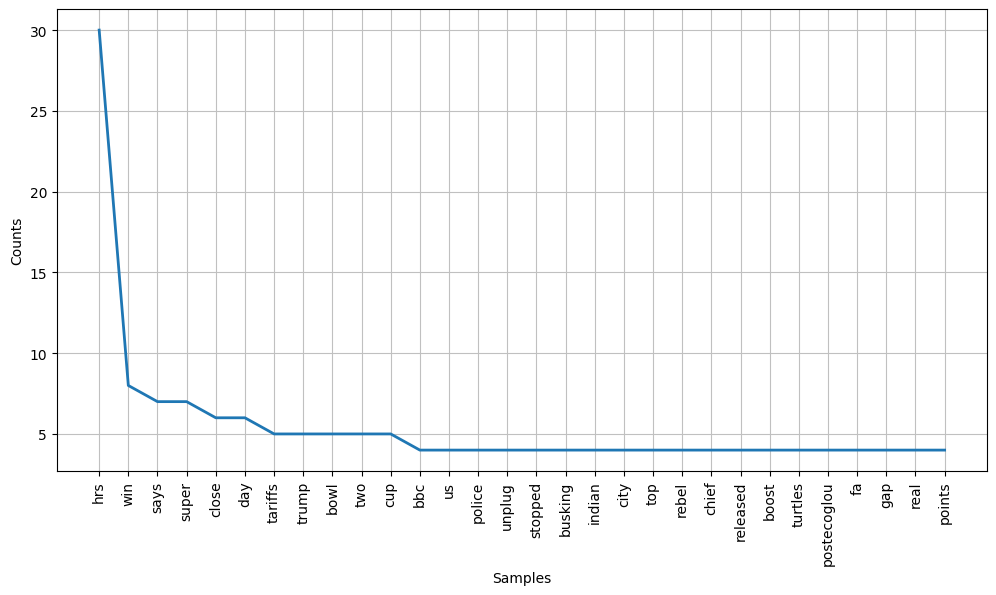

In [9]:

plt.figure(figsize=(12, 6))
freq_dis_nltk.plot(30, cumulative=False)
plt.show()


##  Display Word Cloud

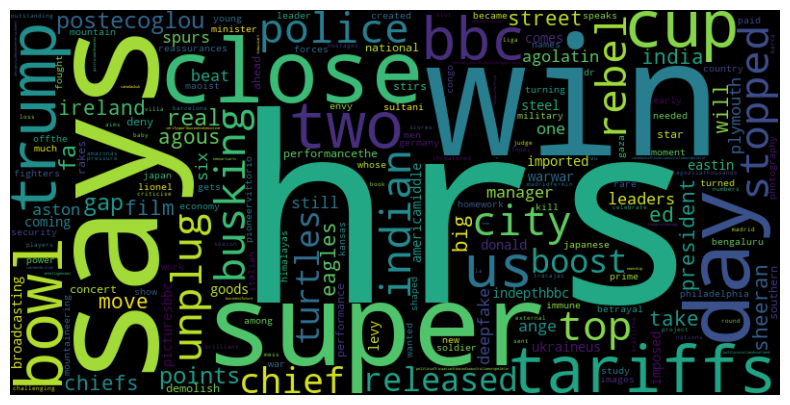

In [10]:
# Step 6: Display Word Cloud with Enhanced Aesthetics
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black',  
    colormap='viridis',  
    contour_color='white', 
    contour_width=2
).generate_from_frequencies(freq_dis_nltk)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()